# day-11 linear regression -house proce prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
dataset =pd.read_csv("Housing.csv")
X = dataset.iloc[:, 1:2].values
y =dataset.iloc[:,0:1].values

In [23]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [33]:
print(X)
print(y)

[[ 7420]
 [ 8960]
 [ 9960]
 [ 7500]
 [ 7420]
 [ 7500]
 [ 8580]
 [16200]
 [ 8100]
 [ 5750]
 [13200]
 [ 6000]
 [ 6550]
 [ 3500]
 [ 7800]
 [ 6000]
 [ 6600]
 [ 8500]
 [ 4600]
 [ 6420]
 [ 4320]
 [ 7155]
 [ 8050]
 [ 4560]
 [ 8800]
 [ 6540]
 [ 6000]
 [ 8875]
 [ 7950]
 [ 5500]
 [ 7475]
 [ 7000]
 [ 4880]
 [ 5960]
 [ 6840]
 [ 7000]
 [ 7482]
 [ 9000]
 [ 6000]
 [ 6000]
 [ 6550]
 [ 6360]
 [ 6480]
 [ 6000]
 [ 6000]
 [ 6000]
 [ 6000]
 [ 6600]
 [ 4300]
 [ 7440]
 [ 7440]
 [ 6325]
 [ 6000]
 [ 5150]
 [ 6000]
 [ 6000]
 [11440]
 [ 9000]
 [ 7680]
 [ 6000]
 [ 6000]
 [ 8880]
 [ 6240]
 [ 6360]
 [11175]
 [ 8880]
 [13200]
 [ 7700]
 [ 6000]
 [12090]
 [ 4000]
 [ 6000]
 [ 5020]
 [ 6600]
 [ 4040]
 [ 4260]
 [ 6420]
 [ 6500]
 [ 5700]
 [ 6000]
 [ 6000]
 [ 4000]
 [10500]
 [ 6000]
 [ 3760]
 [ 8250]
 [ 6670]
 [ 3960]
 [ 7410]
 [ 8580]
 [ 5000]
 [ 6750]
 [ 4800]
 [ 7200]
 [ 6000]
 [ 4100]
 [ 9000]
 [ 6400]
 [ 6600]
 [ 6000]
 [ 6600]
 [ 5500]
 [ 5500]
 [ 6350]
 [ 5500]
 [ 4500]
 [ 5450]
 [ 6420]
 [ 3240]
 [ 6615]
 [ 6600]
 

In [34]:
#split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0) #state of random factors

In [35]:
print(X_train)

[[ 6000]
 [10269]
 [ 5400]
 [ 4120]
 [ 7980]
 [ 3850]
 [ 6840]
 [ 3630]
 [ 4600]
 [ 8080]
 [ 2550]
 [ 3970]
 [ 6000]
 [ 4040]
 [ 6000]
 [ 5300]
 [ 4800]
 [ 4600]
 [ 7420]
 [ 2910]
 [ 7200]
 [ 3640]
 [ 3750]
 [ 7500]
 [ 6660]
 [ 4080]
 [ 4520]
 [ 6000]
 [ 6615]
 [ 6254]
 [ 8050]
 [ 6000]
 [ 4646]
 [ 4320]
 [ 3185]
 [ 4500]
 [ 7800]
 [ 5500]
 [ 4050]
 [ 2650]
 [ 4990]
 [ 8100]
 [ 3630]
 [11175]
 [ 4840]
 [ 3520]
 [ 6540]
 [ 4000]
 [ 4120]
 [ 6930]
 [ 3792]
 [ 3520]
 [ 2400]
 [ 1836]
 [ 6210]
 [ 3360]
 [ 4775]
 [ 3510]
 [ 4950]
 [ 8250]
 [ 7350]
 [ 6325]
 [ 4410]
 [10700]
 [ 6900]
 [ 3090]
 [ 4370]
 [ 6710]
 [ 5450]
 [ 5880]
 [ 6360]
 [ 3000]
 [ 2145]
 [11410]
 [ 3635]
 [ 4360]
 [ 3500]
 [ 3120]
 [ 5600]
 [ 7200]
 [ 5450]
 [ 3240]
 [ 5948]
 [ 5000]
 [ 5136]
 [ 6000]
 [ 6800]
 [ 3460]
 [ 3520]
 [ 7000]
 [ 3090]
 [ 9960]
 [ 3420]
 [ 4400]
 [10500]
 [ 3760]
 [ 3680]
 [ 6800]
 [ 3630]
 [ 8520]
 [ 4260]
 [ 3480]
 [ 2015]
 [ 3000]
 [ 5400]
 [ 3850]
 [ 4510]
 [ 3000]
 [ 5800]
 [ 2398]
 [ 3150]
 

In [56]:
print(y_test)

[[ 4585000]
 [ 6083000]
 [ 4007500]
 [ 6930000]
 [ 2940000]
 [ 6195000]
 [ 3535000]
 [ 2940000]
 [ 3500000]
 [ 7980000]
 [ 6755000]
 [ 3990000]
 [ 3150000]
 [ 3290000]
 [ 4130000]
 [ 2660000]
 [ 4410000]
 [ 3710000]
 [ 3360000]
 [ 4270000]
 [ 5005000]
 [ 5383000]
 [ 6440000]
 [ 1890000]
 [ 6125000]
 [ 5460000]
 [ 5803000]
 [ 4620000]
 [ 5530000]
 [ 5950000]
 [ 4305000]
 [ 3640000]
 [ 5250000]
 [ 3325000]
 [ 3703000]
 [ 4753000]
 [ 9100000]
 [ 3500000]
 [ 3150000]
 [ 4270000]
 [ 8960000]
 [ 4060000]
 [ 5740000]
 [ 3129000]
 [ 3633000]
 [ 7560000]
 [ 4620000]
 [ 3290000]
 [ 4165000]
 [ 6650000]
 [ 4165000]
 [ 4690000]
 [ 3150000]
 [ 3850000]
 [ 3290000]
 [ 5075000]
 [ 6510000]
 [ 5740000]
 [ 3780000]
 [ 4795000]
 [ 4900000]
 [ 5460000]
 [ 3500000]
 [ 7525000]
 [ 2835000]
 [ 5495000]
 [ 8680000]
 [ 4200000]
 [ 4200000]
 [ 4900000]
 [ 3332000]
 [ 6195000]
 [ 4098500]
 [ 6650000]
 [ 3885000]
 [ 4620000]
 [ 1960000]
 [ 6440000]
 [ 1750000]
 [ 3605000]
 [ 3290000]
 [ 4970000]
 [ 4613000]
 [ 3

In [66]:
#import linear regression class
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
#regressor.fit(X_train,y_train)
regressor.fit(X,y)

LinearRegression()

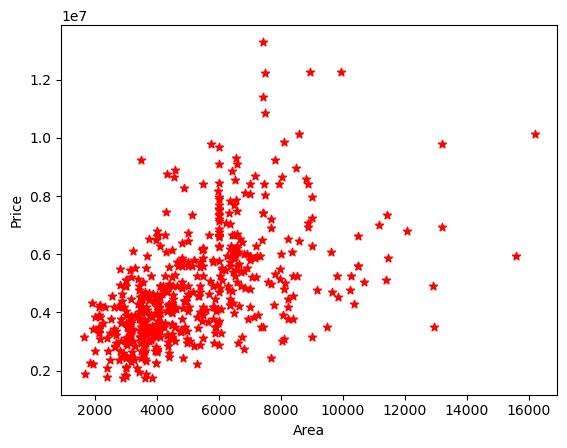

In [67]:
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(dataset.area,dataset.price,color='red',marker='*')

In [68]:
y_pred=regressor.predict(X)


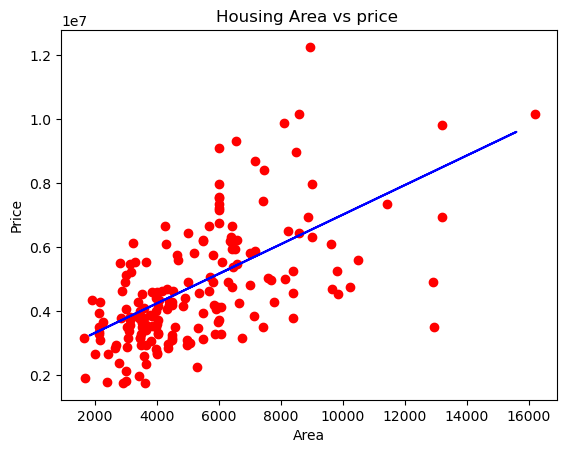

In [69]:
#plot graphical representation
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Housing Area vs price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [70]:
Area=7420
predictedprice=regressor.predict([[Area]])
print(predictedprice)

[[5815162.19790048]]


# Theory output

In [63]:
m=regressor.coef_
print(m)
b=regressor.intercept_
print(b)

[[480.89364335]]
[2364035.4983763]


# y=mx+b

In [71]:
x=7420
y1=m*x+b
print("the price of {0} square feet Land is:{1}".format(x,y[0]))

the price of 7420 square feet Land is:[13300000]
